# Способы расчета страхового запаса на основе требований к уровню обслуживания

## Расчет страхового запаса на основе уровня обслуживания I типа (вероятности бездефицитного цикла)

Наиболее простой способ расчета страхового запаса - через вероятность образования дефицита в течение цикла движения запасов. Назовем эту вероятность __уровнем обслуживания I типа__. 


Суть подхода отражена на рисунке. В момент размещения заказа на складе должно оставаться такое количество товара $Q$, чтобы к моменту $L$ прихода поставки спрос $D$ не превысил это количество с заданной вероятностью $P$. Период времени $L$, на который создается запас, при этом зависит от применяемой системы управления запасами. При использовании непрерывного контроля остатка он определяется временем поставки $t_{п}$. При использовании периодического контроля - суммой длительности периода между заказами и времени поставки: $T + t_{п}$

![Страховой запас](qstr.svg 'К моменту прихода поставки совокупный спрос за время ожидания не должен превысить начальный запас')

Пусть $\mu_D$ и $\sigma_D$ - параметры распределения спроса за период $L$. Тогда, задав вероятность отсутствия дефицита $P$, и предположив распределение спроса нормальным, легко вычислить необходимый начальный уровень запаса $Q$:

$$Q = F^{-1}(P) $$ 

где $F^{-1}$ - обратная функция нормального распределения. В Excel ее можно вычислить с помощью функции `НОРМ.ОБР()`.

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['png'] 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Параметры распределения спроса за период
mu = 200
sigma = 50

def F(x):
    "Функция нормального распределения с заданными параметрами mu и sigma в точке x"
    return norm.cdf(x, mu, sigma)

def G(p):
    "Обратная функция нормального распределения с заданными параметрами mu и sigma для вероятности p"
    return norm.ppf(p, mu, sigma)

In [3]:
# Надежность обслуживания (вероятность отсутствия дефицита)
P = 0.9
# Начальный запас
Q = G(P)
# Страховой запас
Qs = Q - mu
print('Начальный запас: %.0f, страховой запас: %.0f' %(Q, Qs))

Начальный запас: 264, страховой запас: 64


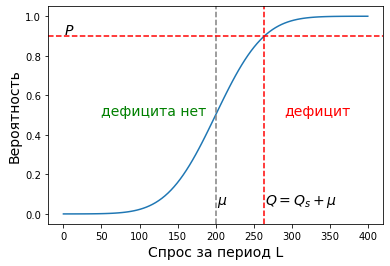

In [4]:
# Построение графика функции распределения
x = np.linspace(0, mu + 4 * sigma,100)
plt.plot(x, F(x))
plt.axvline(mu, ls='--', color='gray')
plt.text(mu*1.01, 0.05,  r'$\mu$', fontsize=14)
plt.axhline(P, ls='--', color='red')
plt.axvline(Q, ls='--', color='red')
plt.text(1, P+0.01, '$P$', fontsize=14)
plt.text(Q+1, 0.05, r'$Q = Q_s + \mu$', fontsize=14)
plt.text(mu-3*sigma, 0.5, 'дефицита нет', fontsize=14, color='green')
plt.text(Q*1.1, 0.5, 'дефицит', fontsize=14, color='red')
plt.xlabel('Спрос за период L', fontsize=14)
plt.ylabel('Вероятность', fontsize=14);

К этому же результату можно прийти и другим путем, используя стандартное нормальное распределение. Обратная функция этого распределения позволяет вычислить стандартизованное значение начального запаса $z$, которое затем можно преобразовать к требуемому масштабу по формуле:

$$Q = z \cdot \sigma_D + \mu.$$

Страховой запас в этом случае равен:
К этому же результату можно прийти и другим путем, используя стандартное нормальное распределение. Обратная функция этого распределения позволяет вычислить стандартизованное значение начального запаса $z$, которое затем можно преобразовать к требуемому масштабу по формуле:

$$Q_s = z \cdot \sigma_D.$$

In [5]:
#Расчет квантиля стандартного нормального распределения уровня P
z_P = norm.ppf(P, 0, 1)
#Расчет начального запаса
Q = z_P * sigma + mu
#Расчет страхового запаса
Qs = z_P * sigma
print('z = %.2f, начальный запас: %.0f, страховой запас: %.0f' % (z_P, Q, Qs))

z = 1.28, начальный запас: 264, страховой запас: 64


Результаты такие же

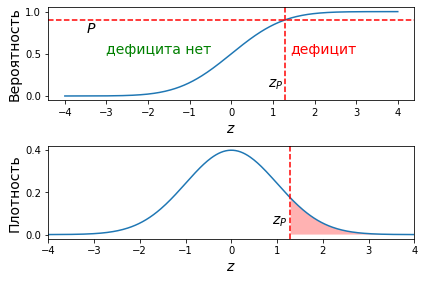

In [6]:
# Построение графика функции и плотности стандартного нормального распределения

z = np.linspace(-4, 4, 300)
# Функция распределения
plt.subplot(211)
plt.plot(z, norm.cdf(z, 0, 1))
plt.axhline(P, ls='--', color='red')
plt.axvline(z_P, ls='--', color='red')
plt.text(-3.5, P-0.15, '$P$', fontsize=14)
plt.text(z_P-.4, 0.1, '$z_P$', fontsize=14)
plt.text(-3, 0.5, 'дефицита нет', fontsize=14, color='green')
plt.text(z_P*1.1, 0.5, 'дефицит', fontsize=14, color='red')
plt.xlabel('$z$', fontsize=14)
plt.ylabel('Вероятность', fontsize=14);

# Плотность распределения
plt.subplot(212)
plt.plot(z, norm.pdf(z, 0, 1))
plt.fill_between(z, norm.pdf(z, 0, 1), where=z >= z_P, facecolor='red', alpha=0.3)
plt.axvline(z_P, ls='--', color='red')
plt.text(z_P-.4, 0.05, '$z_P$', fontsize=14)
plt.xlabel('$z$', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.xlim(-4,4)
plt.tight_layout();

Рассмотренный выше подход к расчету страхового запаса позволяет учесть только вероятность образования дефицита, но не величину упущенного спроса. Это делает невозможной определение оптимального уровня обслуживания, поскольку нельзя связать напрямую уровень обслуживания и потери из-за упущенного спроса. Кроме того, уровень обслужививания типа I (вероятность отсутствия дефицита в течение цикла движения запасов) на практике редко используется. Более распространенным показателем уровня обслуживания является **норма насыщения спроса** (piece fill rate, PFR), которую мы назовем: "**уровень обслуживания II типа**".

По определению, норма насыщения спроса рассчитывается как отношение поставленного клиентам количества $S$ к заказанному $D$:

$$PFR = \frac{S}{D}.$$

Данный показатель поволяет оценить величину потерь от дефицита непосредственно.

## Расчет страхового запаса на основе уровня обслуживания II типа (нормы насыщения спроса)

Чтобы найти потери от дефицита, рассмотрим, что происходит, когда выбирается некоторый норматив страхового запаса.
Для упрощения расчетов, будем рассматривать стандартизованные величины: $z$ - величина спроса за период, $z_s$ - норматив страхового запаса.

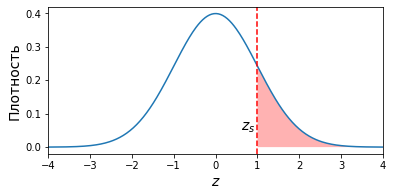

In [7]:
#Норматив страхового запаса:
z_s = 1.0

#График плотности распределения
plt.plot(z, norm.pdf(z, 0, 1))
plt.fill_between(z, norm.pdf(z, 0, 1), where=z >= z_s, facecolor='red', alpha=0.3)
plt.axvline(z_s, ls='--', color='red')
plt.text(z_s-.4, 0.05, '$z_s$', fontsize=14)
plt.xlabel('$z$', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.xlim(-4,4)
ax = plt.gca()
ax.set_aspect(8);

Если спрос $z$ не превышает страховой запас $z_s$, то потерь от дефицита нет. Если спрос превысит страховой запас на 1, то потери составят 1. Таким образом, стандартизованная величина потерь $zl$ составит:
\begin{equation}
    \begin{aligned}
        zl = 
            \begin{cases}
            0, & \text{если } z \le z_s\\
            z-z_s, & \text{если } z>z_s.
            \end{cases}
    \end{aligned}
\end{equation}


Ожидаемую величину потерь можно найти по аналогии с вычислением математического ожидания (среднего) случайной величины.

Математическое ожидание случайной величины можно найти по формуле: $$m_x = \int\limits_{-\infty}^{+\infty} x\cdot f(x)\, \mathrm{d}x,$$ где $x$ - случайная величина, $f(x)$ - плотность распределения.

Поскольку потери дефицита возникают только когда спрос превышает страховой запас, нижний предел интегрирования - $z_s$. Ожидаемые потери $m_{zl}$:

$$m_{zl} = \int\limits_{z_s}^{+\infty} (z-z_s)\cdot f(z)\, \mathrm{d}z, $$ где $z$ - стандартизованная величина спроса, $z_s$ - страховой запас, $f(z)$ - плотность стандартного нормального распределения.

Данную формулу можно использовать непосредственно, однако возникают сложности с вычислением интеграла: необходимо математическое программное обеспечение, которое предоставляет возможности численного интегрирования. Формулу можно использовать для любого непрерывного распределения спроса, не обязательно нормального.

In [8]:
# Пример расчета 
z_s = 1.0 #Норматив страхового запаса

def loss(z):
    return (z - z_s) * norm.pdf(z, 0, 1)
from scipy.integrate import quad
m_zl, eps = quad(loss, z_s, np.inf)

m_l = m_zl * sigma #Величина потерь в единицах измерения спроса

print('При z_s = %.2f ожидаемые потери составят %.2f, или %.1f единиц продукта (стандартное отклонение спроса = %.0f)'
      %(z_s, m_zl, m_l, sigma))


При z_s = 1.00 ожидаемые потери составят 0.08, или 4.2 единиц продукта (стандартное отклонение спроса = 50)


Для проведения расчетов в Excel необходимо преобразовать формулу для ожидаемых потерь:

$$m_{zl} = \int\limits_{z_s}^{+\infty} (z-z_s)\cdot f(z)\, \mathrm{d}z = \int\limits_{z_s}^{+\infty} z \cdot f(z)\, \mathrm{d}z - z_s \cdot \int\limits_{z_s}^{+\infty} f(z)\, \mathrm{d}z.$$ 


Учитывая, что $$ F(z_s) = \int\limits_{-\infty}^{z_s} f(z)\, \mathrm{d}z $$ второй интеграл можно заменить на: 
$$ \int\limits_{z_s}^{+\infty} f(z)\, \mathrm{d}z = 1 - F(z_s).$$

Также можно показать, что первый интеграл равен:

$$\int\limits_{z_s}^{+\infty} z \cdot f(z)\, \mathrm{d}z = f(z_s).$$

С учетом этих преобразований, ожидаемые потери составят: $$ m_{zl} = f(z_s) - z_s \cdot (1-F(z_s)), $$

где:  
 $z_s$ - стандартизованный норматив страхового запаса,  
 $f(z_s)$ и $F(z_s)$ - соответственно, плотность и функция стандартного нормального распределения в точке $z_s$.
 
 Все компоненты этой формулы можно легко вычислить в Excel с использованием функции `НОРМ.СТ.РАСП()`.

In [9]:
# Расчет по преобразованной формуле:

# Пример расчета 
z_s = 1.0 #Норматив страхового запаса

m_zl = norm.pdf(z_s, 0, 1) - z_s * (1 - norm.cdf(z_s, 0, 1))

m_l = m_zl * sigma

print('При z_s = %.2f ожидаемые потери составят %.2f, или %.1f единиц продукта (стандартное отклонение спроса = %.0f)'
      %(z_s, m_zl, m_l, sigma))

При z_s = 1.00 ожидаемые потери составят 0.08, или 4.2 единиц продукта (стандартное отклонение спроса = 50)


Результат идентичен полученному ранее.

Остается связать эту формулу с уровнем обслуживания. По определению, норма насыщения спроса рассчитывается как отношение поставленного клиентам количества $S$ к заказанному $D$. 
Ожидаемые потери, рассчитанные с использованием выведенной формулы, отражают величину дефицита. Поэтому:
$$PFR = \frac{S}{D} = 1 - \frac{\sigma \cdot m_{zl}} {\mu},$$

где $\mu, \sigma$ - параметры распределения спроса, $m_{zl}$ - стандартизованные ожидаемые потери.

Данная формула позволяет спрогнозировать уровень обслуживания при выбранном нормативе страхового запаса (который определяет $m_{zl}$).
Однако часто необходимо решить обратную задачу - найти норматив страхового запаса, соответствующий требуемому уровню обслуживания $PFR$.

В этом случае необходимо подобрать такой норматив страхового запаса $z_s$, чтобы ожидаемые потери составили:

$$ m_{zl} = \frac {(1-PFR) \cdot \mu} {\sigma} $$

С учетом полученной ранее формулы для $m_{zl}$, требуется решить уравнение:

$$ f(z_s) - z_s \cdot (1-F(z_s)) = \frac {(1-PFR) \cdot \mu} {\sigma},$$

или:

$$ f(z_s) - z_s \cdot (1-F(z_s)) - \frac {(1-PFR) \cdot \mu} {\sigma} = 0.$$

Чтобы найти корень данного уравнения в Excel, можно:
- использовать графический метод - построить график правой части полученного уравнения как функцию от $z_s$ и найти точку пересечения с осью абсцисс;
- использовать функцию подбора параметра (установить значение в ячейке левой части равным нулю, изменяя ячейку, содержащую страховой запас)
- использовать надстройку "Поиск решения" с аналогичными установками.

In [10]:
# Расчет необходимого норматива страхового запаса для достижения PFR = 99%
PFR = 0.99

def m_zl(z_s):
    return norm.pdf(z_s, 0, 1) - z_s * (1 - norm.cdf(z_s, 0, 1))

def delta(z_s):
    return m_zl(z_s) - (1 - PFR) * mu / sigma

def rhs(z_s):
    return np.ones(z_s.shape) * (1 - PFR) * mu / sigma

In [11]:
# Численное решение уравнения
from scipy.optimize import root

result = root(delta, 1)
z_s = result.x[0]
print('Норматив страхового запаса: z_s = %.2f, Q_стр = %.1f' % (z_s, z_s * sigma))


Норматив страхового запаса: z_s = 1.36, Q_стр = 68.0


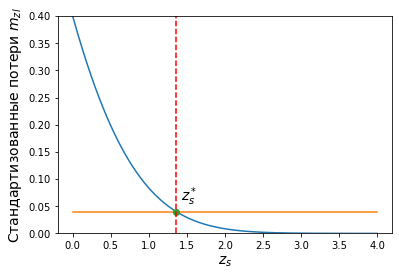

In [12]:
z = np.linspace(0, 4, 300)
#график левой части уравнения
plt.plot(z, m_zl(z))
#график правой части уравнения
plt.plot(z, rhs(z))
plt.plot(z_s, m_zl(z_s),'o')
plt.axvline(z_s, ls='--', color='red')
plt.text(z_s*1.05, m_zl(z_s)+.02, '$z_s^*$', fontsize=14)
plt.xlabel('$z_s$', fontsize=14)
plt.ylabel('Стандартизованные потери ' + r'$m_{zl}$', fontsize=14)
plt.ylim(0,0.4);

Функцию $m_{zl}(z_s)$ также называют функцией ожидаемых потерь, или [функцией Брауна](http://emm.ostu.ru/lect/braun.html).

Пример расчета параметров системы управления запасами при использовании уровня обслуживания II типа см. [здесь](http://emm.ostu.ru/lect/lect4_3.html#vopros7).

## Сравнение норматива страхового запаса при использовании уровня обслуживания I и II типа

Рассмотренные два метода расчета дают существенно различные нормативы страхового запаса
### Уровень обслуживания I и II рода при одинаковом нормативе страхового запаса


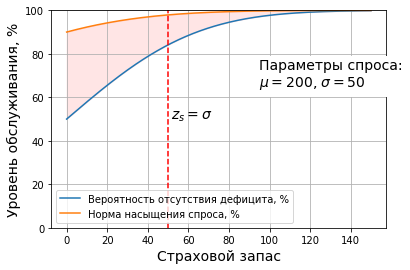

In [13]:
# Сравнение уровня обслуживания при одинаковом нормативе страхового запаса

def P(Q_s):
    'Уровень обслуживания I типа - вероятность отсутствия дефицита в цикле движения запасов'
    return norm.cdf(Q_s, 0, sigma) * 100

def PFR(Q_s):
    'Уровень обслуживания II типа - норма насыщения спроса'
    return (1 - m_zl(Q_s/sigma) * sigma / mu) * 100

Q_s = np.linspace(0, 3 * sigma, 300)

plt.plot(Q_s, P(Q_s), label='Вероятность отсутствия дефицита, %')
plt.plot(Q_s, PFR(Q_s), label='Норма насыщения спроса, %')
plt.fill_between(Q_s, PFR(Q_s), P(Q_s), alpha=0.1, color='red')
plt.legend(loc='best')
plt.xlabel('Страховой запас', fontsize=14)
plt.ylabel('Уровень обслуживания, %', fontsize=14)
plt.axvline(sigma, ls='--', color='red')
plt.text(sigma*1.03, 50, r'$z_s = \sigma$', fontsize=14)
plt.grid()
plt.text(1.9*sigma, 65, 'Параметры спроса:\n'+r'$\mu='+str(mu)+'$, '+ '$\sigma=' + str(sigma)+'$', 
         fontsize=14, bbox=dict(color='white'))
plt.ylim(0,100);

Из графика видно, что для любого страхового запаса $PFR > P$. Разница наиболее существенна при низком нормативе страхового запаса: при отсутствии страхового запаса $P=50\%$, а $PFR \approx 90\%$. Это объясняется тем, что величина дефицита может быть незначительной, поэтому она не существенно влияет на $PFR$. Надежность обслуживания $P$, напротив, учитывает любой дефицит, его величина не имеет значения.

### Норматив страхового запаса при одинаковом уровне обслуживания

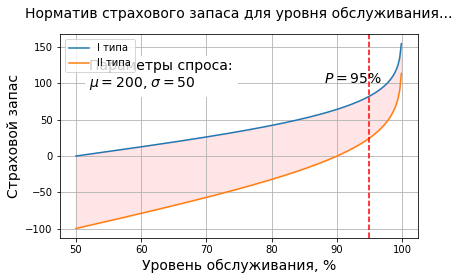

In [14]:
# Сравнение уровня обслуживания при одинаковом нормативе страхового запаса
def Q_s_I(P):
    'Норматив страхового запаса для заданного уровня обслуживания I типа'
    return norm.ppf(P, 0, sigma)

@np.vectorize
def Q_s_II(P):
    'Норматив страхового запаса для заданного уровня обслуживания II типа'    
    
    def delta(z_s):        
        return m_zl(z_s) - (1 - P) * mu / sigma
    
    result = root(delta, 1)
    z_s = result.x[0]
    Q_s = z_s * sigma    
    return np.clip(Q_s,0,Q_s.max())

P = np.linspace(0.5, 0.999, 200)

y1 = Q_s_I(P)
y2 = Q_s_II(P)
plt.plot(P*100, y1, label='I типа')
plt.plot(P*100, y2, label='II типа')
plt.fill_between(P*100, y2, y1, alpha=0.1, color='red')
plt.legend(loc='upper left')
plt.ylabel('Страховой запас', fontsize=14)
plt.xlabel('Уровень обслуживания, %', fontsize=14)
plt.grid()
plt.axvline(95, color='red', ls='--')

plt.text(52, 1.9*sigma, 'Параметры спроса:\n'+r'$\mu='+str(mu)+'$, '+ '$\sigma=' + str(sigma)+'$', 
         fontsize=14, bbox=dict(color='white'))

plt.text(88, sigma*2, r'$P = 95\%$', fontsize=14)
plt.title('Норматив страхового запаса для уровня обслуживания...', fontsize=14, y=1.05)
plt.tight_layout();

Из графика видно, что использование для расчета страхового запаса уровня обслуживания I типа приводит к завышенным значениям норматива. В рассмотренном примере экономия страхового запаса составляет 60 единиц!

При расчете параметров систем управления запасами рекомендуется использовать уровень обслуживания II рода. Это особенно важно, если нет установленных нормативов по сервису и необходима оптимизация уровня обслуживания с учетом потерь от дефицита и затрат на хранение запасов. В этом случае можно применять только метод, основанный на $PFR$.